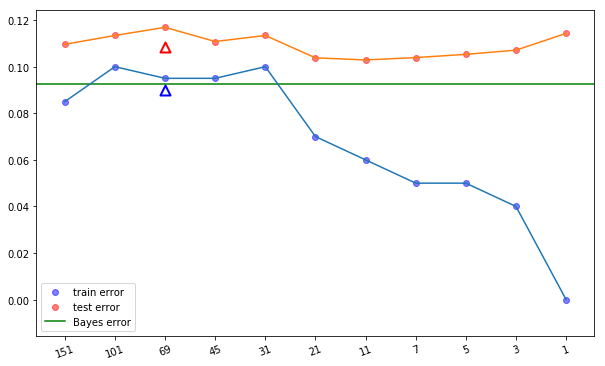

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as nn
import sklearn.linear_model as lm
import math
import random

np.random.seed(8871)

csize = 10;       # number of centers
p = 2;
s = 1;      # sd for generating the centers within each class
m1 = np.reshape(np.random.normal(size=csize*p), (csize, p))*s + np.reshape([1, 0]*csize, (csize,p))
m0 = np.reshape(np.random.normal(size=csize*p), (csize, p))*s + np.reshape([0, 1]*csize, (csize,p))

n = 100;
# Randomly allocate the n samples for class 1  to the 10 clusters
id1 = np.random.choice(csize,n)
# Randomly allocate the n samples for class 1 to the 10 clusters
id0 = np.random.choice(csize,n)

s = np.sqrt(float(1)/5);                               # sd for generating x.
traindata = np.reshape(np.random.normal(size= 2*n*p), (2*n, p))*s + np.concatenate(
    (m1[id1,:], m0[id0,:]),axis=0)
Ytrain = np.concatenate(([1]*n, [0]*n))

N = 5000;
id1 = np.random.choice(csize, N)
id0 = np.random.choice(csize, N)
testdata = np.reshape(np.random.normal(size = 2*N*p), (2*N, p))*s + np.concatenate(
    (m1[id1, :], m0[id0, :]), axis = 0)
Ytest = np.concatenate(([1]*N, [0]*N))


def mixnorm(x):

  ## return the density ratio for a point x, where each
  ## density is a mixture of normal with 10 components
    return np.sum(np.exp(-np.sum((np.sum((m1, -x), axis = 0))**2,
                                 axis=1)*float(5)/float(2)))/np.sum(np.exp(-np.sum((np.sum((m0, -x), axis = 0))**2,
                                 axis=1)*float(5)/float(2)))

Ytest_pred_Bayes = [mixnorm(x)>1 for x in testdata]
test_err_Bayes = sum(Ytest !=  Ytest_pred_Bayes) / float(2*N)

myk = [151, 101, 69, 45, 31, 21, 11, 7, 5, 3, 1]
m = len(myk);

train_err_knn = [0]*m;
test_err_knn = [0]*m;

for j in range(m):
    nbrs = nn.KNeighborsClassifier(n_neighbors = myk[j]).fit(traindata, Ytrain)
    Ytrain_pred = nbrs.predict(traindata)
    train_err_knn[j] = sum(Ytrain != Ytrain_pred)/float(2*n)
    Ytest_pred = nbrs.predict(testdata)
    test_err_knn[j] = sum(Ytest != Ytest_pred)/float(2*N)

regr = lm.LinearRegression()
regr.fit(traindata, Ytrain)
Ytrain_pred_LS = (regr.predict(traindata)>0.5)
Ytest_pred_LS = (regr.predict(testdata)>0.5)
train_err_LS = sum(Ytrain !=  Ytrain_pred_LS) / float(2*n);
test_err_LS = sum(Ytest !=  Ytest_pred_LS) / float(2*N);

df = 2*n/np.array(myk)
t = plt.figure(figsize=(10,6))
pknn_train = plt.scatter(range(m), train_err_knn, color = "blue", marker = "o", alpha = 0.5)
pknn_test = plt.scatter(range(m), test_err_knn, color = "red", marker = "o", alpha = 0.5)
plt.scatter(2, train_err_LS, s = 100, marker = '^', facecolor = 'w', edgecolor = 'blue', linewidth = '2')
plt.scatter(2, test_err_LS, s = 100, marker = '^',facecolor = 'w', edgecolor = 'red', linewidth = '2')
pbayes = plt.axhline(y = test_err_Bayes, color = 'green', linestyle = '-')
plt.plot(range(m), train_err_knn, test_err_knn)
plt.xticks(range(m), myk , rotation=20)
plt.legend((pknn_train, pknn_test, pbayes),
           ('train error', 'test error', 'Bayes error'), loc = 'lower left')

t.savefig('AssignmentOutput_1_8871_kvn3.pdf')
plt.show()